In [315]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [207]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [208]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [219]:
X = X.astype(np.float32)
y = y.astype(np.int64)

In [155]:
def label_to_one_hot(l):
    ret = np.zeros(10)
    ret[l] = 1 
    return ret
    
    
#label_to_one_hot(2)
#y = np.array( [label_to_one_hot(l) for l in y] )

In [156]:
INPUT_SIZE = 784
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10 


In [422]:
class NeuralNet( torch.nn.Module ):
    
    def __init__(self, input_size=784, hidden_size = 50, output_size=10):
        
        super(NeuralNet, self).__init__()
        
        self.hidden = torch.nn.Linear( input_size, hidden_size)
        self.output = torch.nn.Linear( hidden_size, output_size)
    
    def forward(self, X):
        
        out = self.hidden( X)
        out = torch.relu(out)
        out = self.output(out)
        return out
        
        

In [482]:

X = X/X.max()
X.max()



1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

In [424]:
X_train.shape, X_test.shape

((46900, 784), (23100, 784))

In [ ]:

x_test = torch.from_numpy(X_test)

In [474]:
net = NeuralNet(hidden_size=200)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

In [475]:
BATCH_SIZE = 512

In [476]:
NUM_EPOCHS = 30
epoch_loss = []
accs = []
for epoch in range(NUM_EPOCHS):
    losses = []
    
    net.train()
    for i in range(0, X_train.shape[0], BATCH_SIZE):

        optimizer.zero_grad()
        x_in = torch.from_numpy( X[i:i+BATCH_SIZE] )

        ret = net(x_in)

        targets = torch.from_numpy( y[i:i+BATCH_SIZE] )
        loss = loss_fn(ret, targets)

        losses.append(loss.item())
        loss.backward()
        optimizer.step()

    epoch_loss.append(np.mean(losses))
    
    net.eval()
    ret = net(x_test)
    pred = ret.argmax(dim=1)
    acc = accuracy_score(y_test, pred)
    accs.append(acc)
    
    if epoch % 5 == 0 :
        print( f"epoch {epoch}, train loss={np.mean(epoch_loss):.3}, validation accuracy = {acc:.3}")
    

epoch 0, train loss=1.27, validation accuracy = 0.855
epoch 5, train loss=0.529, validation accuracy = 0.916
epoch 10, train loss=0.411, validation accuracy = 0.932
epoch 15, train loss=0.353, validation accuracy = 0.943
epoch 20, train loss=0.314, validation accuracy = 0.95
epoch 25, train loss=0.285, validation accuracy = 0.956


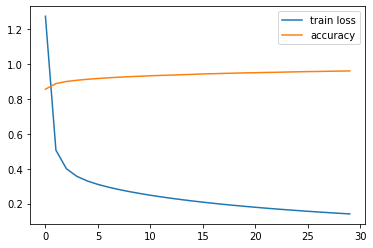

In [478]:
plt.plot( range(NUM_EPOCHS), epoch_loss, label="train loss")
plt.plot( range(NUM_EPOCHS), accs, label="accuracy")
plt.legend()
plt.show()

In [481]:
net.eval()
ret = net(x_test)
pred = ret.argmax(dim=1)
acc = accuracy_score(y_test, pred)
acc

0.9597835497835497